## Ejercicio de Dijkstra

Se muestra la clase Vertex y la clase Graph, estos han sido adecuados para que funcione el algoritmo de Dijkstra mediante etiquetado. A continuación se presenta la imagen que contienen el ejemplo que se codificó, a pesar de que puede ser configurado cualquier otro grafo. Los vértices son:

0 = a <br />
1 = b <br />
2 = c <br />
3 = d <br />
4 = e <br />
5 = f <br />
6 = g <br />
7 = h


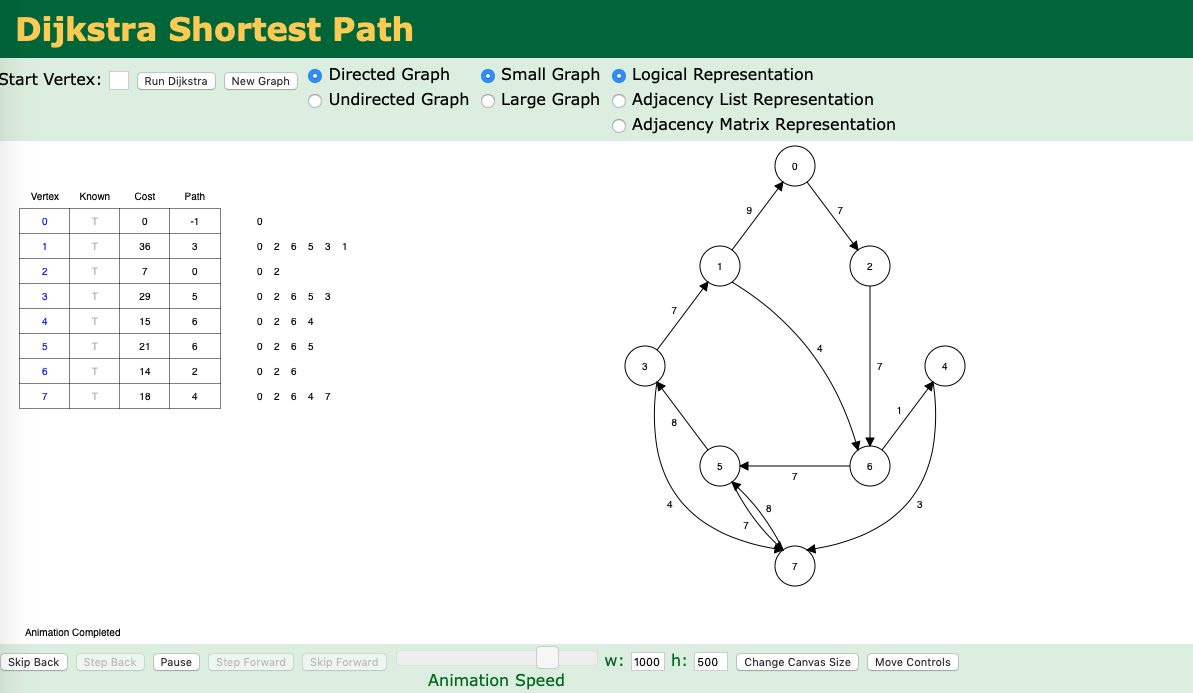

In [2]:
from IPython.display import Image
Image(filename='Dijkstra-Graph-Example.png') 

In [3]:
class Vertex:
    def __init__(self, label):
        self.label = label;
        self.linkedTo = {};
        self.status = False;
        self.coste = [float('inf'), None];
        
    def addAdjacentVertex(self, adjacentVertex, weight):
        self.linkedTo[adjacentVertex] = weight;
        #adjacentVertex.linkedTo[adjacentVertex.getLabel()] = weight
        
    def getConnections(self):
        return self.linkedTo;
        
    def getLabel(self):
        return self.label;
        
    def getWeight(self, adjacentVertex):
        return self.linkedTo[adjacentVertex];
        
    def getCosteValue(self):
        return self.coste[0];
        
    def getCosteVertex(self):
        return self.coste[1];
        
    def setCosteInfo(self, value, vertexLabel):
        self.coste = [value, vertexLabel];
        
    def setStatus(self, status):
        self.status = status;
        
    def getStatus(self):
        return self.status;

In [4]:
class Graph:
    def __init__(self):
        self.vertexSet = {}
        
    def addVertex(self, label):
        newVertex = Vertex(label);
        self.vertexSet[label] = newVertex;
        return newVertex;
        
    def getVertexSet(self):
        return self.vertexSet;
        
    def getVertex(self, label):
        if self.exists(label):
            return self.vertexSet[label];
        return None
        
    def exists(self, label):
        return label in self.vertexSet;
        
    def addEdge(self, vertexFrom, vertexTo, weight = 0):
        if not self.exists(vertexFrom):
            self.addVertex(vertexFrom);
        if not self.exists(vertexTo):
            self.addVertex(vertexTo);
        self.vertexSet[vertexFrom].addAdjacentVertex(self.vertexSet[vertexTo], weight);
        
    def getVertexes(self):
        return self.vertexSet.values();
        
    def getVertexLabels(self):
        return iter(self.vertexSet.keys())
    

In [5]:
class Algorithms:
    
    def __init__(self, algorithmId, v_from, v_to, graph):
        self.g = graph;
        if(algorithmId == 1):
            return self.Dijkstra(v_from, v_to, v_from, self.g);
    
    
    #########################################
    ### Dijkstra Algorithm
    #########################################
    def Dijkstra(self, v_from, v_to, originalFrom, G):
        current_v = G.getVertex(v_from);
        # if current_v is the origin vertex, then the coste from itself is 0
        if not current_v.getCosteVertex():
            print("start vertex: ", current_v.getLabel())
            current_v.setCosteInfo(0, current_v.getLabel());
        print("----------------------------------------------------------------")
        print("----------- processing each connection of ", current_v.getLabel(), " ------------------")
        # for each adjacent vertex from current vertice is necessary to check all values to get the minor and replace
        for v in current_v.getConnections():
            print("Before: ", v.getLabel(), " [", v.getCosteValue(), " - ", v.getCosteVertex(), "]");
            weightInfo = current_v.getWeight(v);
            if (not v.getCosteVertex() or (v.getCosteValue() > (current_v.getCosteValue() + weightInfo))):
                v.setCosteInfo((current_v.getCosteValue() + weightInfo), current_v);
                print("Later: ", v.getLabel(), " [", v.getCosteValue(), " - ", v.getCosteVertex().getLabel(), "]");

        # mark the current_v as visited to discard it for future coste evaluations
        current_v.setStatus(True);
        # Now, it's necessary to get the new curent_v with min value on the graph (no visited vertexes)
        current_v = self.getMinVertexCosteValue();
        
        #if exists the new vertex then process it, but else show a message with no route found
        if(current_v):        
            print("-----------------------------");
            print("new current_v: ", current_v.getLabel())
            
            if(current_v.getLabel() == v_to):
                pathway = self.getPathway(current_v, originalFrom);
                print("La ruta con menor coste desde ", originalFrom, " hasta ", v_to, " es: ", pathway, ", con coste de: ", current_v.getCosteValue());
            else:
                self.Dijkstra(current_v.getLabel(), v_to, originalFrom, G)
        else:
            print("Sin ruta desde ", originalFrom, " hasta ", v_to);
        
    # Method to get the vertex with min value of coste
    def getMinVertexCosteValue(self):
        minValue = float('inf');
        minVertex = None;
        for v in self.g.getVertexes():
            #print("--------------------- Status of ", v.getLabel(), ": ", v.getStatus(), " with value: ", v.getCosteValue());
            if(v.getCosteValue() < minValue and not v.getStatus()):
                minValue = v.getCosteValue();
                minVertex = v;
        return minVertex;
            
    # Method to process the coste value and vertex for pathway
    def getPathway(self, current_v, originalFrom, pathway = ''):
        if(current_v.getLabel() == originalFrom):
            return (current_v.getLabel() + ' - ' + pathway);
        else:
            if(pathway == ''):
                pathway = current_v.getLabel();
            else:
                pathway = current_v.getLabel() + " - " + pathway;
            return self.getPathway(current_v.getCosteVertex(), originalFrom, pathway);
        

In [6]:
g = Graph();  
g.addEdge('a', 'c', 7);
g.addEdge('b', 'a', 9);
g.addEdge('b', 'g', 4);
g.addEdge('c', 'g', 7);
g.addEdge('d', 'h', 4);
g.addEdge('d', 'b', 7);
g.addEdge('e', 'h', 3);
g.addEdge('f', 'd', 8);
g.addEdge('f', 'h', 7);
g.addEdge('g', 'f', 7);
g.addEdge('g', 'e', 1);
g.addEdge('h', 'f', 8);

Algorithms(1, 'a', 'b', g);


start vertex:  a
----------------------------------------------------------------
----------- processing each connection of  a  ------------------
Before:  c  [ inf  -  None ]
Later:  c  [ 7  -  a ]
-----------------------------
new current_v:  c
----------------------------------------------------------------
----------- processing each connection of  c  ------------------
Before:  g  [ inf  -  None ]
Later:  g  [ 14  -  c ]
-----------------------------
new current_v:  g
----------------------------------------------------------------
----------- processing each connection of  g  ------------------
Before:  f  [ inf  -  None ]
Later:  f  [ 21  -  g ]
Before:  e  [ inf  -  None ]
Later:  e  [ 15  -  g ]
-----------------------------
new current_v:  e
----------------------------------------------------------------
----------- processing each connection of  e  ------------------
Before:  h  [ inf  -  None ]
Later:  h  [ 18  -  e ]
-----------------------------
new current_v:  h
-------